# Simple Linear Regression

In this example we will consider sales based on 'TV' marketing budget.

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

### Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data=pd.read_csv('tvmarketing.csv')

In [25]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [26]:
data.tail(4)

,TV,Sales
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [27]:
df=data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [29]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [30]:
df.columns

Index(['TV', 'Sales'], dtype='object')

In [20]:
df.shape

(200, 2)

### Visualisation using Seaborn

In [31]:
import seaborn as sns

C:\Users\chait\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatter plot of Sales and TV')

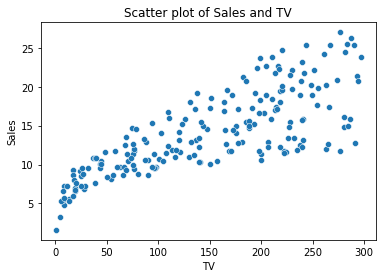

In [42]:
sns.scatterplot(df['TV'],df['Sales'])
plt.title('Scatter plot of Sales and TV')

### Perfroming Simple Linear Regression

Equation of linear regression

y = c + m1x1 + m2x2+.....+mnxn

•	y is the response

•	c is the intercept

•	m1 is the coefficient for the first feature

•	mn is the coefficient for the nth feature

In our case:

y = c + m1 * TV


The m values are called the model coefficients or model parameters.

#### Generic Steps in Model Building using sklearn


Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

### Preparing X and y

The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.

However, X can be a dataframe as Pandas is built over NumPy.

In [43]:
X=df['TV']

In [44]:
y=df['Sales']

### Splitting Data into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=30, random_state=34)

In [48]:
print(X_train.ndim)
print(y_train.ndim)
print(X_test.ndim)
print(y_test.ndim)

1
1
1
1


This shows it is an 1D array we need to make it to 2D array

In [49]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

C:\Users\chait\AppData\Local\Temp\ipykernel_6484\1179647778.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\chait\AppData\Local\Temp\ipykernel_6484\1179647778.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [50]:
print(X_train.ndim)
print(X_test.ndim)

2
2


In [51]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(170, 1)
(170,)
(30, 1)
(30,)


### Performing Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression().fit(X_train, y_train)

### Coefficients Calculation

In [57]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.146369998923736
[0.04657111]


y = 7.146 + 0.046 * TV

Now, let's use this equation to predict our sales.

### Predictions

In [58]:
y_pred = lr.predict(X_test)

In [59]:
y_pred

array([17.08464406, 10.22472012, 20.54022013,  8.92538625, 12.30179145,
       17.41529891,  7.9799928 , 12.54861832,  9.92200793, 18.96611675,
       14.43940523, 13.25184202,  8.42707542,  8.01724968, 13.80138107,
       20.38653548, 15.75736753, 14.20189258, 16.577019  , 16.90767385,
        7.69125194, 10.88137271,  7.93342169, 16.40936302, 11.32379822,
       13.6802962 , 20.787047  , 10.04774991,  8.47830364, 16.65153277])

In [60]:
type(y_pred)

numpy.ndarray

### Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

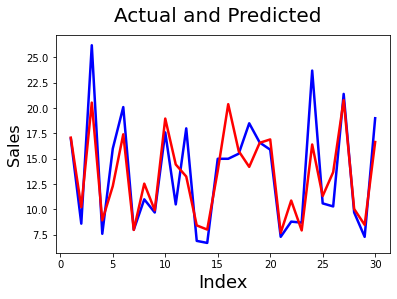

In [62]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,31,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

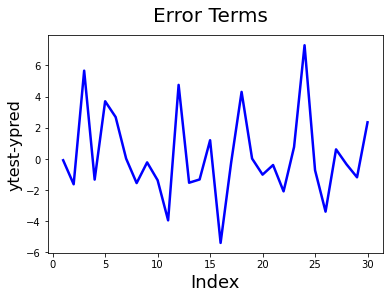

In [64]:
# Error terms
c = [i for i in range(1,31,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [66]:
r_squared = r2_score(y_test, y_pred)

In [67]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.711680212506904
r_square_value : 0.7339205488938118


Text(0, 0.5, 'Predicted Y')

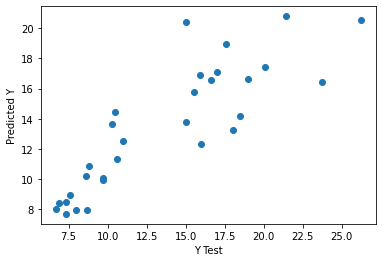

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')